In [164]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report,mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder,Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [165]:
wine = pd.read_csv('C:/Users/admin\Documents/train.csv',delimiter=";")

In [166]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [167]:
wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white
5,7.6,0.3,0.52,13.2,0.042,61,148,0.9984,2.98,0.47,9.1,6,white
6,6.4,0.3,0.40,6.2,0.040,46,169,0.9953,3.15,0.46,9.3,6,white
7,6.6,0.3,0.36,1.7,0.038,22,101,0.9912,3.29,0.57,11.6,6,white
8,7.6,0.3,0.25,9.5,0.030,15,136,0.9937,3.10,0.44,12.1,6,white
9,7.6,0.3,0.49,20.2,0.060,30,145,1.0020,3.01,0.44,8.5,5,white


C:\Users\admin\AppData\Local\Temp\ipykernel_2588\3855443334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = wine.corr()


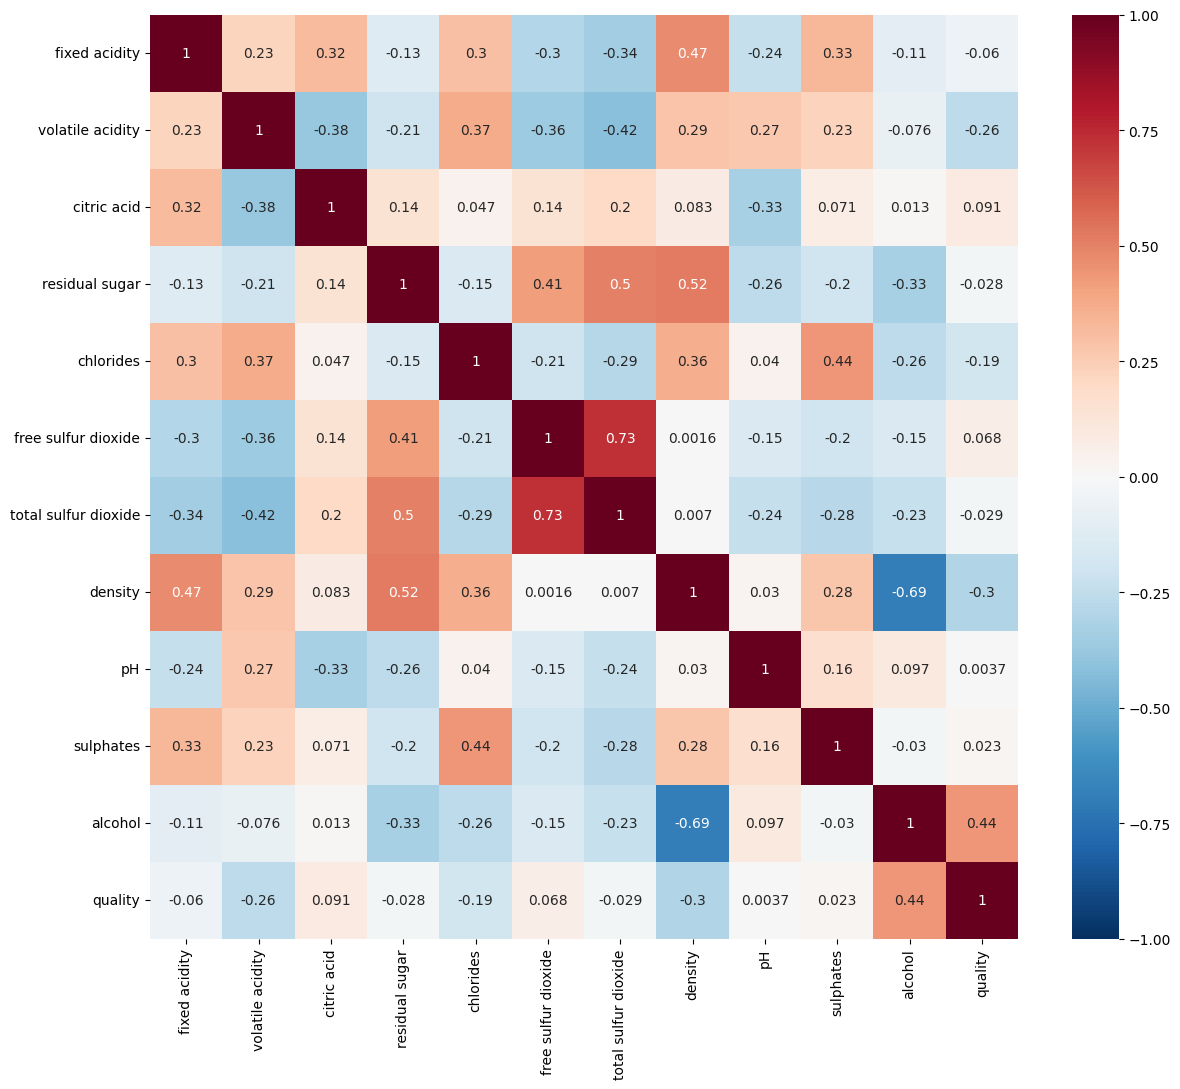

In [168]:
correlation = wine.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [169]:
def data_processing(wine):
    label_quality = LabelEncoder()
    wine['type'] = label_quality.fit_transform(wine['type'])
    return wine

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>]], dtype=object)

<Figure size 1200x600 with 0 Axes>

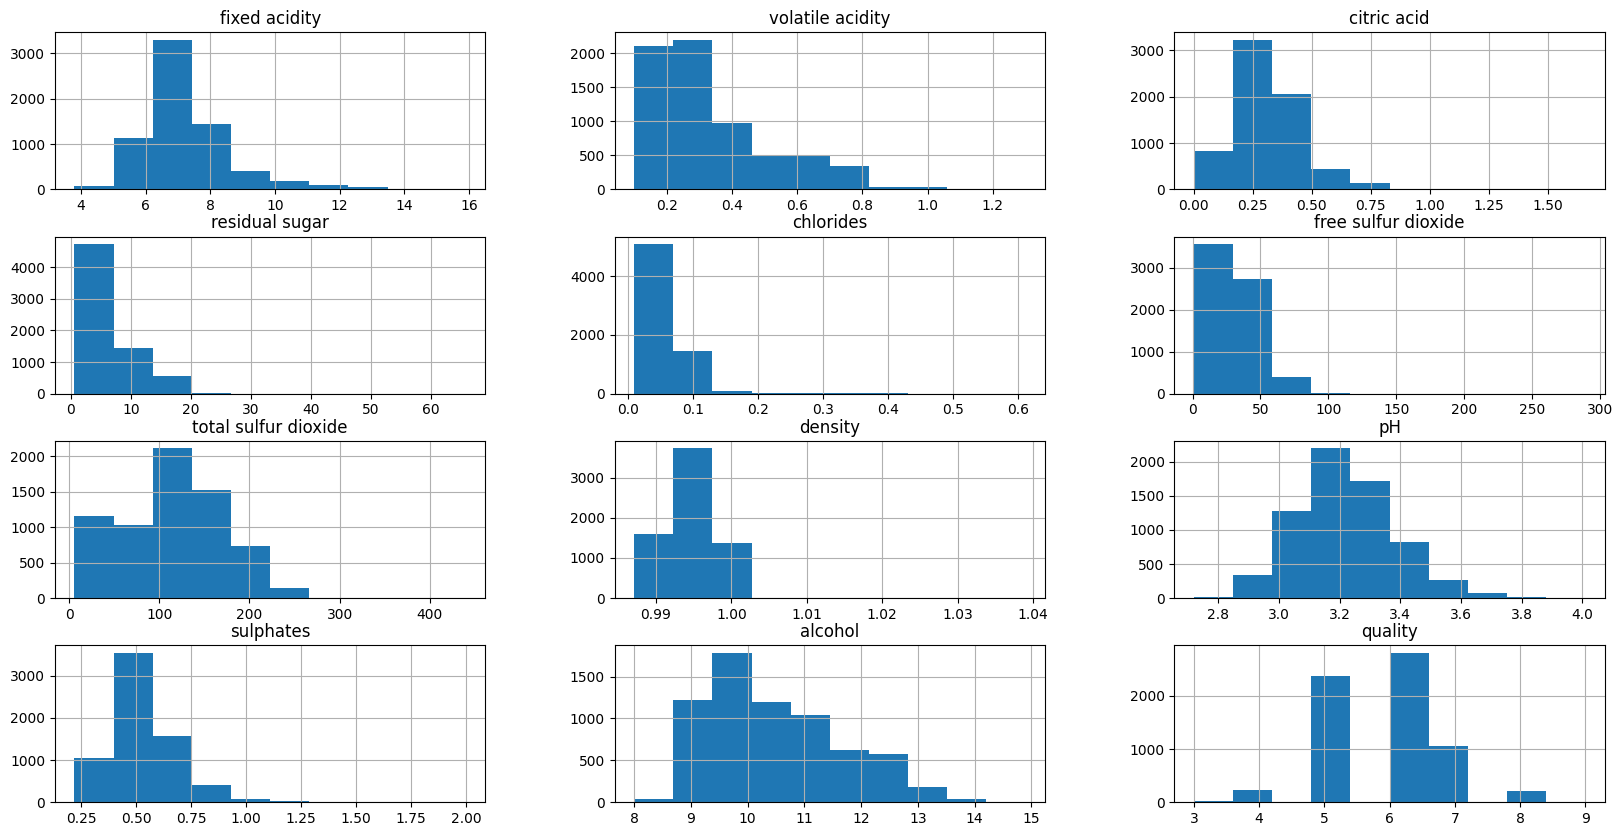

In [170]:
fig = plt.figure(figsize = (12,6))
wine.hist(figsize = (20,10))

<AxesSubplot: >

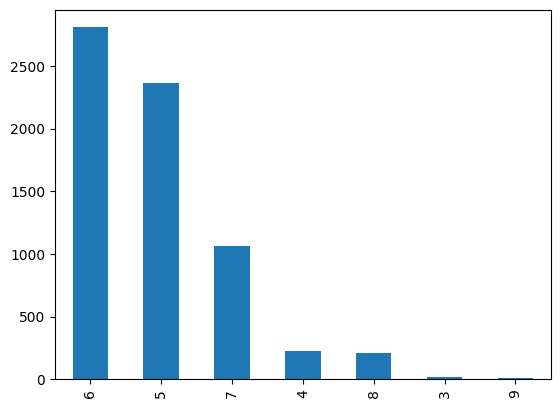

In [171]:
wine['quality'].value_counts().plot(kind='bar')

In [172]:
wine = data_processing(wine)

In [173]:
X = wine.drop('quality', axis = 1)
y = wine['quality']


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [175]:
#X_train = Normalizer().fit(X_train)

In [176]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [177]:
#rfc = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)

In [178]:
#rfc = Lasso(alpha = 0.01).fit(X_train, y_train)

In [179]:
#rfc = AdaBoostRegressor(random_state=0, n_estimators=100).fit(X_train, y_train)

In [180]:
#rfc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0).fit(X_train, y_train)

In [181]:
rfc = ExtraTreesRegressor(n_estimators = 10000,random_state=42).fit(X_train,y_train)
#1000 42

In [182]:
#rfc = GradientBoostingRegressor(n_estimators=200,random_state=40).fit(X_train, y_train)

In [183]:
#rfc = MLPRegressor(random_state=3, max_iter=500).fit(X_train, y_train)

In [184]:
#rfc = ExtraTreesClassifier(n_estimators=200, random_state=5).fit(X_train, y_train)

In [185]:
#rfc = RandomForestRegressor(n_estimators=200,max_depth=100, random_state=20).fit(X_train, y_train)


In [186]:
print("Score :", rfc.score(X_test,y_test))
pred_rfc =rfc.predict(X_test)
print("RMSE : " , np.sqrt(mean_squared_error(y_test, pred_rfc)))
#RMSE.append(np.sqrt(mean_squared_error(y_test, pred_rfc)))

Score : 0.6230973324609486
RMSE :  0.5300882613643784


In [187]:
#submit
wine_sub = pd.read_csv('C:/Users/admin\Documents/test.csv',delimiter=";")


In [188]:
wine_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    820 non-null    int64  
 1   fixed acidity         820 non-null    float64
 2   volatile acidity      820 non-null    float64
 3   citric acid           820 non-null    float64
 4   residual sugar        820 non-null    float64
 5   chlorides             820 non-null    float64
 6   free sulfur dioxide   820 non-null    float64
 7   total sulfur dioxide  820 non-null    float64
 8   density               820 non-null    float64
 9   pH                    820 non-null    float64
 10  sulphates             820 non-null    float64
 11  alcohol               820 non-null    float64
 12  type                  820 non-null    object 
dtypes: float64(11), int64(1), object(1)
memory usage: 83.4+ KB


In [189]:
wine_sub = data_processing(wine_sub)

In [190]:
id_sub = wine_sub['id']
X_sub = wine_sub.drop('id',axis = 1)
X_sub = sc.transform(X_sub)


In [191]:
# Y_sub = rfc.predict(X_sub)

In [192]:
Y_sub = rfc.predict(X_sub)

In [193]:
outfile = 'submission.csv'
result = {'id':id_sub, 'quality':Y_sub}
df = pd.DataFrame(data=result)
df.to_csv(outfile, index=False)
print('Finished creating subsmission file {}'.format(outfile))

Finished creating subsmission file submission.csv
